In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)  #can only unzip a zipped list once

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barrow us
atuona pf
casablanca ma
butaritari ki
santona es
kasamwa tz
touros br
bluff nz
richards bay za
belmonte br
albany au
yellowknife ca
banyuwangi id
hobart au
luderitz na
nalut ly
khatanga ru
tuktoyaktuk ca
katsuura jp
hobart au
nizhneyansk ru
guarapari br
hamilton bm
qaanaaq gl
sentyabrskiy ru
tuktoyaktuk ca
galle lk
bathsheba bb
willowmore za
yellowknife ca
horsham au
yulara au
bredasdorp za
punta arenas cl
codrington ag
eastlake us
alofi nu
hobart au
ribeira grande pt
barentsburg sj
naze jp
messina za
atuona pf
tabuk sa
attawapiskat ca
busselton au
ekhabi ru
chuy uy
jamestown sh
ushuaia ar
haibowan cn
canutama br
new norfolk au
kapaa us
sorvag fo
castro cl
regenstauf de
kapaa us
ushuaia ar
belushya guba ru
cidreira br
longyearbyen sj
punta arenas cl
bend us
liepaja lv
alpine us
bluff nz
rikitea pf
clyde river ca
inhambane mz
iquitos pe
avarua ck
zabol ir
grand gaube mu
rikitea pf
kareli in
jamestown sh
albany au
puerto ayora ec
ushuaia ar
albany au
barrow us
pisco pe
coahuaya

saint anthony ca
grand river south east mu
rikitea pf
aden ye
tome-acu br
bredasdorp za
kamareddi in
ponta do sol cv
albany au
honningsvag no
port keats au
qui nhon vn
butaritari ki
hobart au
east london za
anar darreh af
boromo bf
mys shmidta ru
anloga gh
avarua ck
udachnyy ru
faanui pf
iqaluit ca
bac can vn
illoqqortoormiut gl
punta arenas cl
bredasdorp za
thompson ca
rikitea pf
altay cn
san jeronimo mx
barentsburg sj
turayf sa
brae gb
carnarvon au
busselton au
maldonado uy
broken hill au
trincomalee lk
qaanaaq gl
port alfred za
castro cl
samusu ws
esperance au
port hardy ca
lagoa pt
vardo no
vanimo pg
cape town za
samarai pg
thompson ca
lagoa pt
san antonio cl
carballo es
bethel us
biu ng
el rosal co
babstovo ru
petropavlovsk-kamchatskiy ru
ribeira grande pt
kodiak us
wajima jp
ushuaia ar
aguazul co
isangel vu
bethanien na
georgetown sh
hilo us
guerrero negro mx
hithadhoo mv
qaanaaq gl
mehamn no
cape town za
sunrise manor us
yining cn
hilo us
namibe ao
santa cruz cr
waiouru nz
bluff

lavrentiya ru
oranjemund na
rongcheng cn
fernley us
lac du bonnet ca
hermanus za
churapcha ru
rikitea pf
oranjestad aw
victoria sc
morgan city us
francisco sa br
dunedin nz
kununurra au
saint anthony ca
clyde river ca
chagda ru
hilo us
leh in
bagdarin ru
belushya guba ru
muravlenko ru
makurdi ng
rawah iq
faanui pf
prokopion gr
geraldton au
mahebourg mu
rikitea pf
hobart au
alice springs au
zwedru lr
albany au
punta arenas cl
sisimiut gl
nome us
belushya guba ru
bluff nz
atuona pf
san patricio mx
bethel us
port-gentil ga
hermanus za
thompson ca
busselton au
rawson ar
kodiak us
bilma ne
antofagasta cl
upernavik gl
crossville us
santa maria del oro mx
kavieng pg
bluff nz
angermunde de
iralaya hn
cayenne gf
vaitupu wf
rikitea pf
te anau nz
kankaanpaa fi
mataura pf
hamilton bm
victoria sc
kil no
ponta do sol cv
kruisfontein za
meyungs pw
tuktoyaktuk ca
ushuaia ar
sao francisco br
hobart au
puerto ayora ec
la ronge ca
esperance au
bilibino ru
lagoa pt
lorengau pg
deputatskiy ru
albany au
pis

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



623

In [16]:
# Create an endpoint URL for a city.
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c6813e6d533615538ee19fa8e187979b


In [17]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

boston_data = city_weather.json()

In [18]:
boston_data["sys"]["country"]

'US'

In [19]:
boston_data["dt"]

1610182288

In [20]:
boston_data["coord"]["lat"]

42.3584

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 27 54 1 10.36


In [22]:

# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 1, 9, 8, 51, 28)

In [23]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-09 08:51:28'

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities): # retrive both index and city from list

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): #checks that remainder of index/50 = 0
        set_count += 1 #if that is true, set_count and record_count are incremented by 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") # for cities with two words

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | casablanca
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | santona
Processing Record 6 of Set 1 | kasamwa
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | belmonte
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | banyuwangi
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | nalut
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | nizhneyansk
Processing Record 21 of Set 1 | guarapari
Processing Record 22 of Set 1 | hamilton
Processing Record 23 of Set 1 | qaanaaq
Proce

In [79]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities): # retrive both index and city from list

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50): #checks that remainder of index/50 = 0
        set_count += 1 #if that is true, set_count and record_count are incremented by 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") # for cities with two words

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hambantota
Processing Record 2 of Set 1 | pouembout
Processing Record 3 of Set 1 | pangnirtung
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | nome
Processing Record 6 of Set 1 | la sarre
Processing Record 7 of Set 1 | flin flon
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | seara
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | laguna
Processing Record 13 of Set 1 | turukhansk
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | samusu
City not found. Skipping...
Processing Record 16 of Set 1 | waipawa
Processing Record 17 of Set 1 | pochutla
Processing Record 18 of Set 1 | myanaung
Processing Record 19 of Set 1 | soyo
Processing Record 20 of Set 1 | devonport
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | oda


Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | wilmington
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | kavieng
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | praia
Processing Record 46 of Set 4 | khajuraho
Processing Record 47 of Set 4 | muskegon
Processing Record 48 of Set 4 | pisco
Processing Record 49 of Set 4 | carutapera
Processing Record 50 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | georgetown
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | churumuco
City not found. Skipping...
Processing Record 4 of Set 5 | pozhva
Processing Record 5 of Set 5 | mana
Processing Record 6 of Set 5 | stuhr
Processing Record 7 of Set 5 | kachiry
Processing Record 8 of Set 5 | airai
Processing Record 9 of Set 5 | sedalia
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 |

Processing Record 35 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 36 of Set 8 | moses lake
Processing Record 37 of Set 8 | patan
Processing Record 38 of Set 8 | gilgit
Processing Record 39 of Set 8 | florestopolis
Processing Record 40 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 41 of Set 8 | naryan-mar
Processing Record 42 of Set 8 | yichun
Processing Record 43 of Set 8 | ketchikan
Processing Record 44 of Set 8 | chuy
Processing Record 45 of Set 8 | sibolga
Processing Record 46 of Set 8 | nantucket
Processing Record 47 of Set 8 | bolgatanga
Processing Record 48 of Set 8 | ouango
Processing Record 49 of Set 8 | vzmorye
Processing Record 50 of Set 8 | roma
Processing Record 1 of Set 9 | baykit
Processing Record 2 of Set 9 | kiunga
Processing Record 3 of Set 9 | okhotsk
Processing Record 4 of Set 9 | roald
Processing Record 5 of Set 9 | kalbugan
Processing Record 6 of Set 9 | tefe
Processing Record 7 of Set 9 | ponta delgada
Processing Record

Processing Record 15 of Set 12 | uruacu
Processing Record 16 of Set 12 | tairua
Processing Record 17 of Set 12 | sola
Processing Record 18 of Set 12 | acarau
Processing Record 19 of Set 12 | mersin
Processing Record 20 of Set 12 | rantepao
Processing Record 21 of Set 12 | sovetskaya
Processing Record 22 of Set 12 | bolshoy tsaryn
City not found. Skipping...
Processing Record 23 of Set 12 | de aar
Processing Record 24 of Set 12 | rock sound
Processing Record 25 of Set 12 | kimbe
Processing Record 26 of Set 12 | szczecinek
Processing Record 27 of Set 12 | imamoglu
Processing Record 28 of Set 12 | naustdal
Processing Record 29 of Set 12 | auki
Processing Record 30 of Set 12 | guerrero negro
Processing Record 31 of Set 12 | shingu
Processing Record 32 of Set 12 | lac du bonnet
Processing Record 33 of Set 12 | zeya
Processing Record 34 of Set 12 | grand gaube
Processing Record 35 of Set 12 | muros
Processing Record 36 of Set 12 | melo
Processing Record 37 of Set 12 | akashi
Processing Recor

In [80]:
len(city_data)

565

In [81]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hambantota,6.1241,81.1185,77.00,100,90,2.30,LK,2021-01-09 05:15:25
1,Pouembout,-21.1333,164.9000,84.27,77,98,2.53,NC,2021-01-09 05:15:25
2,Pangnirtung,66.1451,-65.7125,6.33,77,100,0.04,CA,2021-01-09 05:15:25
3,Hermanus,-34.4187,19.2345,69.01,84,5,0.04,ZA,2021-01-09 05:15:26
4,Nome,64.5011,-165.4064,-0.40,71,90,8.05,US,2021-01-09 05:15:26
5,La Sarre,48.8002,-79.1996,11.52,95,69,4.23,CA,2021-01-09 05:15:26
6,Flin Flon,54.7682,-101.8650,14.99,95,0,4.05,CA,2021-01-09 05:15:26
7,Adrar,20.5022,-10.0711,66.42,46,0,9.19,MR,2021-01-09 05:15:26
8,Seara,41.1818,-7.8003,33.01,59,4,2.84,PT,2021-01-09 05:15:27
9,Upernavik,72.7868,-56.1549,8.67,75,100,8.32,GL,2021-01-09 05:15:27


In [82]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]



city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2021-01-09 05:15:25,6.1241,81.1185,77.00,100,90,2.30
1,Pouembout,NC,2021-01-09 05:15:25,-21.1333,164.9000,84.27,77,98,2.53
2,Pangnirtung,CA,2021-01-09 05:15:25,66.1451,-65.7125,6.33,77,100,0.04
3,Hermanus,ZA,2021-01-09 05:15:26,-34.4187,19.2345,69.01,84,5,0.04
4,Nome,US,2021-01-09 05:15:26,64.5011,-165.4064,-0.40,71,90,8.05
...,...,...,...,...,...,...,...,...,...
560,Kudahuvadhoo,MV,2021-01-09 05:13:59,2.6708,72.8944,82.24,77,36,9.06
561,Vilela,PT,2021-01-09 05:17:57,41.2251,-7.6034,33.01,59,13,3.04
562,Saint-Paul,RE,2021-01-09 05:17:57,-21.0096,55.2707,84.20,65,0,18.41
563,Gewane,ET,2021-01-09 05:17:58,10.1664,40.6453,69.04,46,80,5.26


In [83]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [84]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

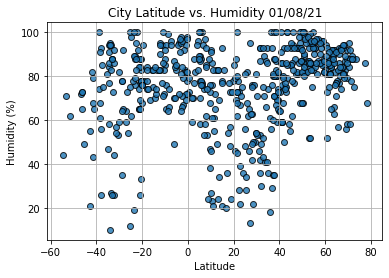

In [86]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

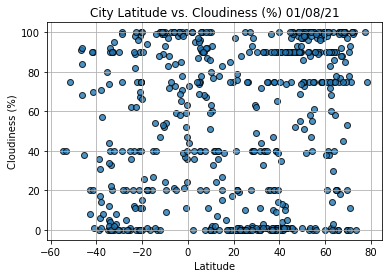

In [87]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

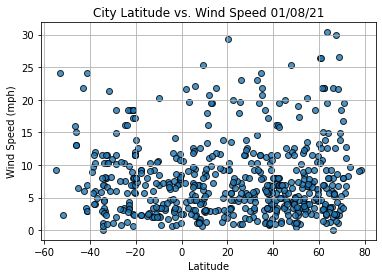

In [88]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [90]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [91]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2021-01-09 05:15:25,6.1241,81.1185,77.00,100,90,2.30
2,Pangnirtung,CA,2021-01-09 05:15:25,66.1451,-65.7125,6.33,77,100,0.04
4,Nome,US,2021-01-09 05:15:26,64.5011,-165.4064,-0.40,71,90,8.05
5,La Sarre,CA,2021-01-09 05:15:26,48.8002,-79.1996,11.52,95,69,4.23
6,Flin Flon,CA,2021-01-09 05:15:26,54.7682,-101.8650,14.99,95,0,4.05
...,...,...,...,...,...,...,...,...,...
558,Gera,DE,2021-01-09 05:17:57,50.8803,12.0819,30.99,84,98,7.40
560,Kudahuvadhoo,MV,2021-01-09 05:13:59,2.6708,72.8944,82.24,77,36,9.06
561,Vilela,PT,2021-01-09 05:17:57,41.2251,-7.6034,33.01,59,13,3.04
563,Gewane,ET,2021-01-09 05:17:58,10.1664,40.6453,69.04,46,80,5.26


In [92]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hambantota,LK,2021-01-09 05:15:25,6.1241,81.1185,77.00,100,90,2.30
2,Pangnirtung,CA,2021-01-09 05:15:25,66.1451,-65.7125,6.33,77,100,0.04
4,Nome,US,2021-01-09 05:15:26,64.5011,-165.4064,-0.40,71,90,8.05
5,La Sarre,CA,2021-01-09 05:15:26,48.8002,-79.1996,11.52,95,69,4.23
6,Flin Flon,CA,2021-01-09 05:15:26,54.7682,-101.8650,14.99,95,0,4.05


In [93]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

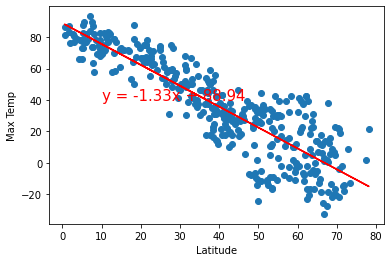

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

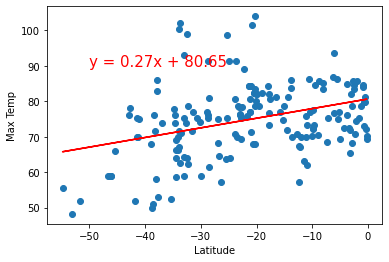

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

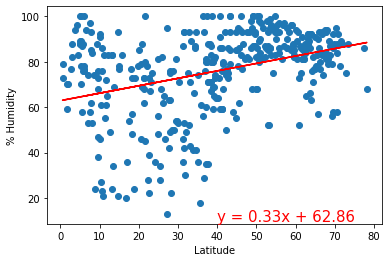

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

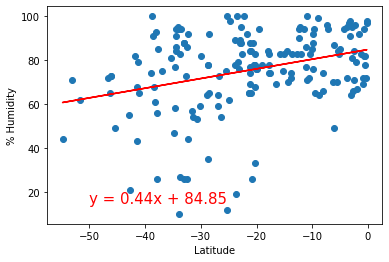

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

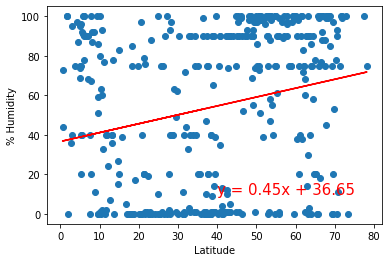

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

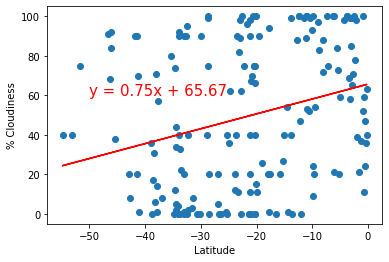

In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

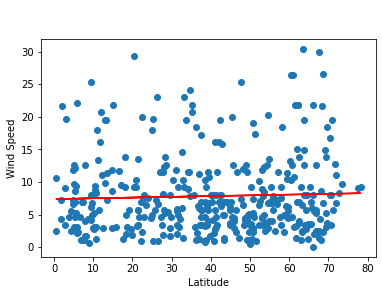

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

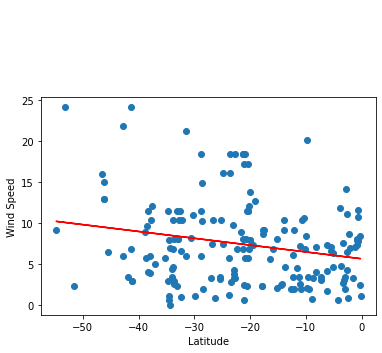

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))